In [1]:
import sys
sys.path.append('../src/')
import model as ez
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tqdm

In [2]:
plt.style.use('default')
# plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.serif"] = "Times New Roman"

# Collision-based model of sediment transport
A lattice model meant to replicate the statistics of sediment transport close to the threshold of motion, in the regime where collisions are thought to dominate.

There are two settings: 
    
   1. Nonperiodic setting, meant to replicate the laboratory flume experiments. In this setting one sets the input flux.
   2. Periodic boundary conditions. In this setting one sets the probability of random entrainment by the fluid.
   
This is still a work in progress and a more comprehensive tutorial will be created once the model is finished. That said, if you have any questions, feel free to email me at: santib@mit.edu

## 1) Nonperiodic, flume-like setup

In [3]:
# Set parameters

# Sets how likely an entrained grain is to entrain a neighboring grain
c_0 = 0.2  
# Sets fraction of grains randomly entrained by fluid each time step.
f = 0.0

# Szie of domain
Nx = 100
Ny = 20

# Average lattice sites hopped over by grain in motion
skipmax = 2

# Main input parameter: number of grains dropped at one end of the domain per time step.
q_in = 5

In [4]:
# Initialize
set_q = ez.set_q(Nx,Ny,c_0,f,skipmax,q_in)

In [5]:
# Quick estimate of how many time steps to take to build the bed
slope_c = np.sqrt((1/(9*set_q.c_0**2))-1)
N = (set_q.Nx*slope_c)*set_q.Nx*0.5*set_q.Ny #total number of beads in 'expected' bed
T = N/q_in # total number of time-steps necessary to build that bed is going to N (particles)/q_in (particles/time step)
T = int(2*T) # so that we build the bed and also have a reasonable steady state

If restarting from a previous run, you can load the state:

In [6]:
# Load data:
# set_q.load_data("./Data/ez_data_Nx_100_Ny_20_qin_0d5_c0_0d2_f_0d0_skip_2_state.h5")
# odata = set_q.get_scalars()

# OR:

# Initialize scalar outputs:
odata = []

In [7]:
for i in tqdm.tqdm(range(T)):
    
    # Save the output four times during the run. All saved in one h5 file.
    # If restarting, outputs will simply add on to the existing file.
    if set_q.tstep % int(T/4) == 0:
        set_q.export_state('./Data/') # choose output directory
    
    # Add to the output scalars:
    odata.append(set_q.get_scalars())
    
    set_q.step()
    
# Save scalars at the end of the run:
set_q.export_scalars('./Data/',odata,restart=False) #If loading from previous run, make this True, so it updates the same file 

100%|███████████████████████████████████████████████████████████████████████████| 53333/53333 [05:31<00:00, 160.75it/s]


In [8]:
# Legend for what 'odata' outputs
set_q.okeys

['tstep', 'time', 'bed_activity', 'q_out']

In [9]:
# Time series
[tstep,t,bed_activity,q_out] = np.array(odata).T

Save the current state:

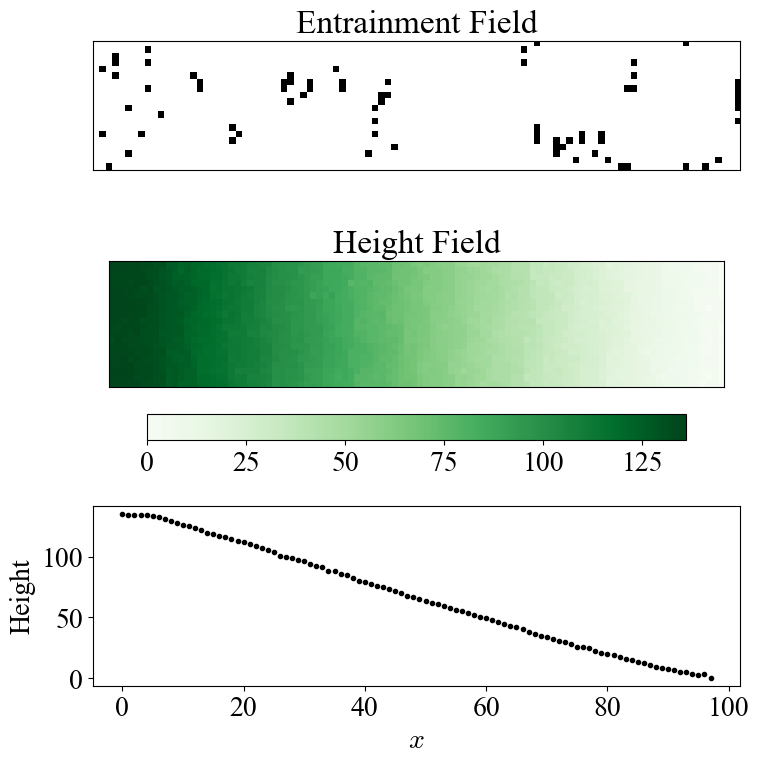

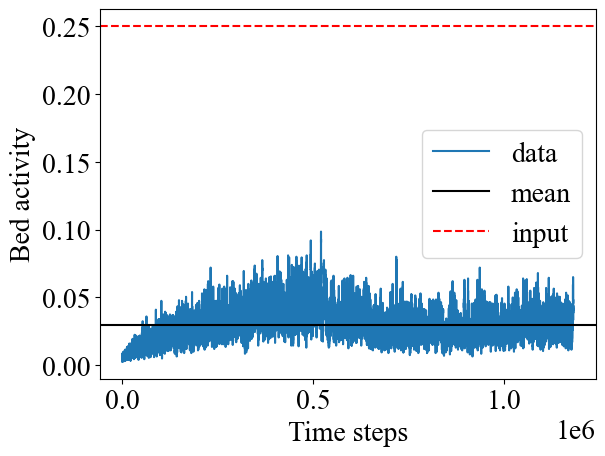

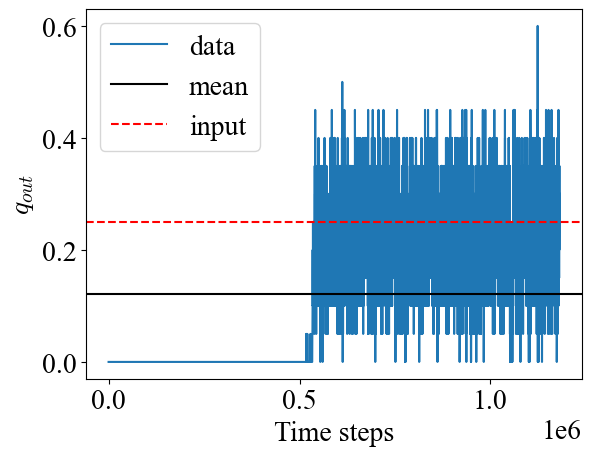

In [10]:
# Quick and easy plotting of the current state
set_q.plot_min()#save=True)

# Plot the other time series you were keeping track of
plt.plot(t,bed_activity,label ="data")
plt.axhline(y=np.mean(bed_activity),c='k',ls='-',label = "mean")
plt.axhline(y=q_in/float(Ny),c='r',ls='--',label = "input")
plt.xlabel("Time steps")
plt.ylabel("Bed activity")
plt.legend()
plt.show()

plt.plot(t,np.array(q_out)/float(set_q.Ny),label ="data")
plt.axhline(y=np.mean(np.array(q_out)/float(set_q.Ny)),c='k',ls='-',label = "mean")
plt.axhline(y=q_in/float(set_q.Ny),c='r',ls='--',label = "input")
plt.xlabel("Time steps")
plt.ylabel(r"$q_{out}$")
plt.legend()
plt.show()

Make a movie!

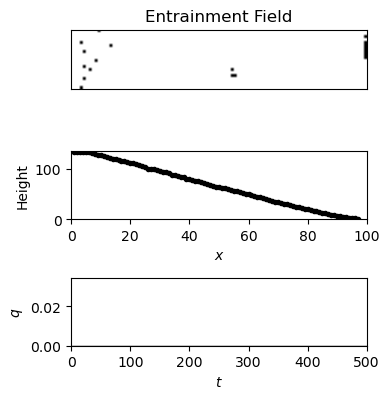

In [12]:
set_q.make_movie(500,20,'./FigsMovies/',name_add='_test')

## 2) Periodic

In [13]:
# Set parameters

# Size of domain
Nx = 100
Ny = 20

# Sets how likely an entrained grain is to entrain a neighboring grain
c_0 = 0.2  
# Main input parameter: fraction of grains randomly entrained by fluid each time step.
f = 10./(Nx*Ny)

# Average lattice sites hopped over by grain in motion
skipmax = 2

# No q_in in this setting

In [14]:
# Initialize
set_f = ez.set_f(Nx,Ny,c_0,f,skipmax,initial=f)

For this setting, we initialize with a bed already:

In [16]:
# Choose slope
slope_c = np.sqrt((1/(9*set_f.c_0**2))-1)

# Build the bed using the built-in function. Input is the slope of the bed only.
set_f.z = set_f.build_bed(slope_c*1.1)

If restarting from a previous run, you can load the state:

In [17]:
# Load data:
# set_f.load_data("./Data/ez_data_Nx_100_Ny_20_qin_0d5_c0_0d2_f_0d0_skip_2_state.h5")
# odata = set_f.get_scalars()

# OR:

# Initialize scalar outputs:
odata = []

In [18]:
for i in tqdm.tqdm(range(10000)):
    
    # Save the output four times during the run. All saved in one h5 file.
    # If restarting, outputs will simply add on to the existing file.
    if set_f.tstep % int(T/4) == 0:
        set_f.export_state('./Data/') # choose output directory
    
    # Add to the output scalars:
    odata.append(set_f.get_scalars())
    
    set_f.step()
    
# Save scalars at the end of the run:
set_f.export_scalars('./Data/',odata,restart=False) #If loading from previous run, make this True, so it updates the same file 

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:57<00:00, 85.24it/s]


In [23]:
# Legend for what 'odata' outputs
set_f.okeys

['tstep', 'time', 'bed_activity']

In [20]:
# Time series
[tstep,t,bed_activity] = np.array(odata).T

Save the current state:

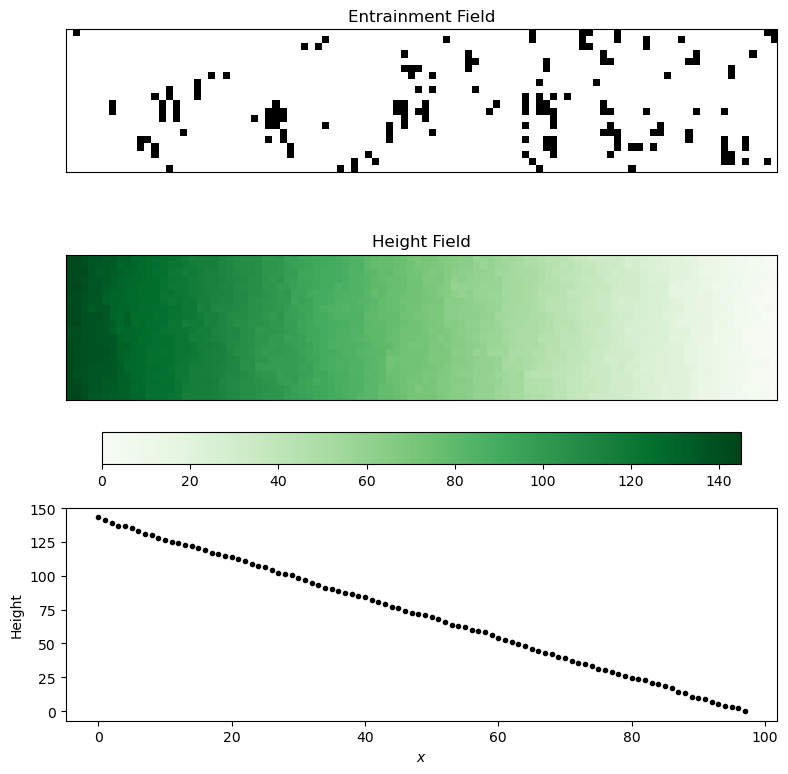

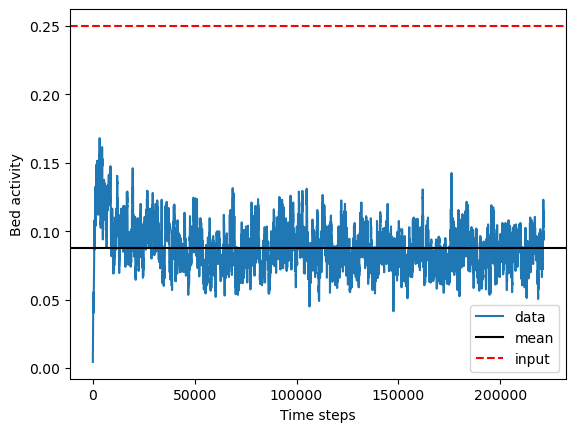

In [24]:
# Quick and easy plotting of the current state
set_f.plot_min()#save=True)

# Plot the other time series you were keeping track of
plt.plot(t,bed_activity,label ="data")
plt.axhline(y=np.mean(bed_activity),c='k',ls='-',label = "mean")
plt.axhline(y=q_in/float(Ny),c='r',ls='--',label = "input")
plt.xlabel("Time steps")
plt.ylabel("Bed activity")
plt.legend()
plt.show()

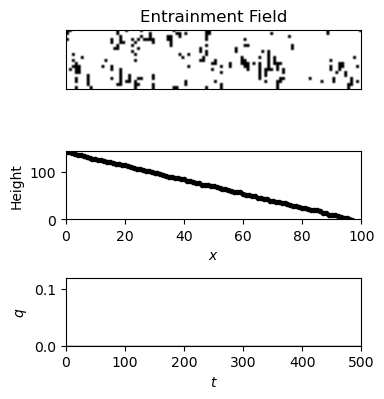

In [22]:
set_f.make_movie(500,20,'./FigsMovies/',name_add='_test')